In [6]:
import pandas as pd
import numpy as np

#open CSV
df =  pd.read_csv('../data/LL24_Completed_bbl.csv', index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
df.shape

(57, 17)

In [3]:
import matplotlib.pyplot as plt             #visualisation
import geopandas as gpd

%matplotlib inline

In [5]:
# set the filepath and load in a shapefile

fp = "bbl_shapes/geo_export_ab0c80d0-c90b-474e-99bc-4ecc53868e48.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df = map_df.drop([25], axis=0)


In [9]:
map_df = map_df.rename(columns={'bbl':'BBL'})
map_df.head()

,BBL,bin,built_code,cnstrct_yr,doitt_id,feat_code,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,name,num_floors,shape_area,shape_len,sub_code,geometry
0,4155980564,4462384.0,None,2001.0,939203.0,2100.0,6.0,26.528549,2005-05-31,00:00:00.000,Constructed,None,2.0,1768.567205,169.940373,210000.0,"POLYGON ((-73.74251 40.59909, -73.74259 40.599..."
1,4163500400,4467306.0,E,1938.0,107990.0,2100.0,8.0,17.947245,2009-02-14,00:00:00.000,Constructed,None,1.0,1105.077843,148.987698,210000.0,"POLYGON ((-73.92091 40.55837, -73.92092 40.558..."
2,4160290023,4529256.0,E,1920.0,931167.0,5110.0,6.0,14.242061,2009-02-14,00:00:00.000,Constructed,None,2.0,402.928037,80.661670,511000.0,"POLYGON ((-73.79829 40.59817, -73.79837 40.598..."
3,4163250001,4540232.0,None,0.0,86053.0,2100.0,16.0,14.529231,2013-09-19,00:00:00.000,Constructed,None,2.0,668.812178,108.680772,210000.0,"POLYGON ((-73.87743 40.56522, -73.87749 40.565..."
4,4160900043,4530675.0,None,2004.0,998592.0,2100.0,7.0,42.447070,2010-07-26,00:00:00.000,Constructed,None,3.0,1094.409581,146.076029,210000.0,"POLYGON ((-73.80335 40.58943, -73.80343 40.589..."


In [10]:
map_df['BBL'] = map_df['BBL'].astype(str).astype('int64')

In [11]:
joined = df.merge(map_df)
joined.head()

,City Council District,Agency,Site,BBL,Address,Borough,Environmental Justice Zone*,Installation date,Installed Capacity,Percentage of Max Peak Demand,...,heightroof,date_lstmo,time_lstmo,lststatype,name,num_floors,shape_area,shape_len,sub_code,geometry
0,1,DOE,M276,1000160040,55 Battery Place,Manhattan,0,7/1/2010,50.0 kW,6%,...,129.640677,2013-07-25,00:00:00.000,Constructed,None,8.0,25306.242613,649.753342,210000.0,"POLYGON ((-74.01711 40.70655, -74.01732 40.706..."
1,1,DOT,Whitehall Ferry Terminal,1000020001,4 South St,Manhattan,0,7/1/2005,59.0 kW,6%,...,90.710000,2013-05-08,00:00:00.000,Constructed,Staten Island Ferry - Whitehall Terminal,5.0,105381.701407,2090.386793,210000.0,"POLYGON ((-74.01291 40.70157, -74.01291 40.701..."
2,1,CUNY,BMCC Chambers St. Building,1001420050,199 Chambers St,Manhattan,0,11/29/2017,307.0 kW,5%,...,23.073830,2015-01-01,00:00:00.000,Constructed,None,0.0,1552.761906,230.212309,211000.0,"POLYGON ((-74.01143 40.71882, -74.01143 40.718..."
3,1,CUNY,BMCC Chambers St. Building,1001420050,199 Chambers St,Manhattan,0,11/29/2017,307.0 kW,5%,...,120.310000,2015-01-01,00:00:00.000,Constructed,None,8.0,182584.241840,3001.731589,210000.0,"POLYGON ((-74.01115 40.72007, -74.01117 40.720..."
4,2,DOE,M022 - NEST,1003350001,111 Columbia St,Manhattan,EJZ,7/1/2014,125.0 kW,20%,...,47.090000,2009-02-14,00:00:00.000,Constructed,None,3.0,60301.966935,1683.329271,210000.0,"POLYGON ((-73.97952 40.71880, -73.98008 40.718..."


In [12]:
joined.dtypes

City Council District                              int64
Agency                                            object
Site                                              object
BBL                                                int64
Address                                           object
Borough                                           object
Environmental Justice Zone*                       object
Installation date                                 object
Installed  Capacity                               object
Percentage of Max Peak Demand                     object
Estimated Annual Production                       object
Percentage of Annual Electricity Consumption      object
Estimated Annual Emissions Reduction              object
Estimated Social Cost of Carbon Value**           object
Estimated Annual Energy Savings***                object
Upfront Project Cost                              object
Financing Mechanism                               object
bin                            

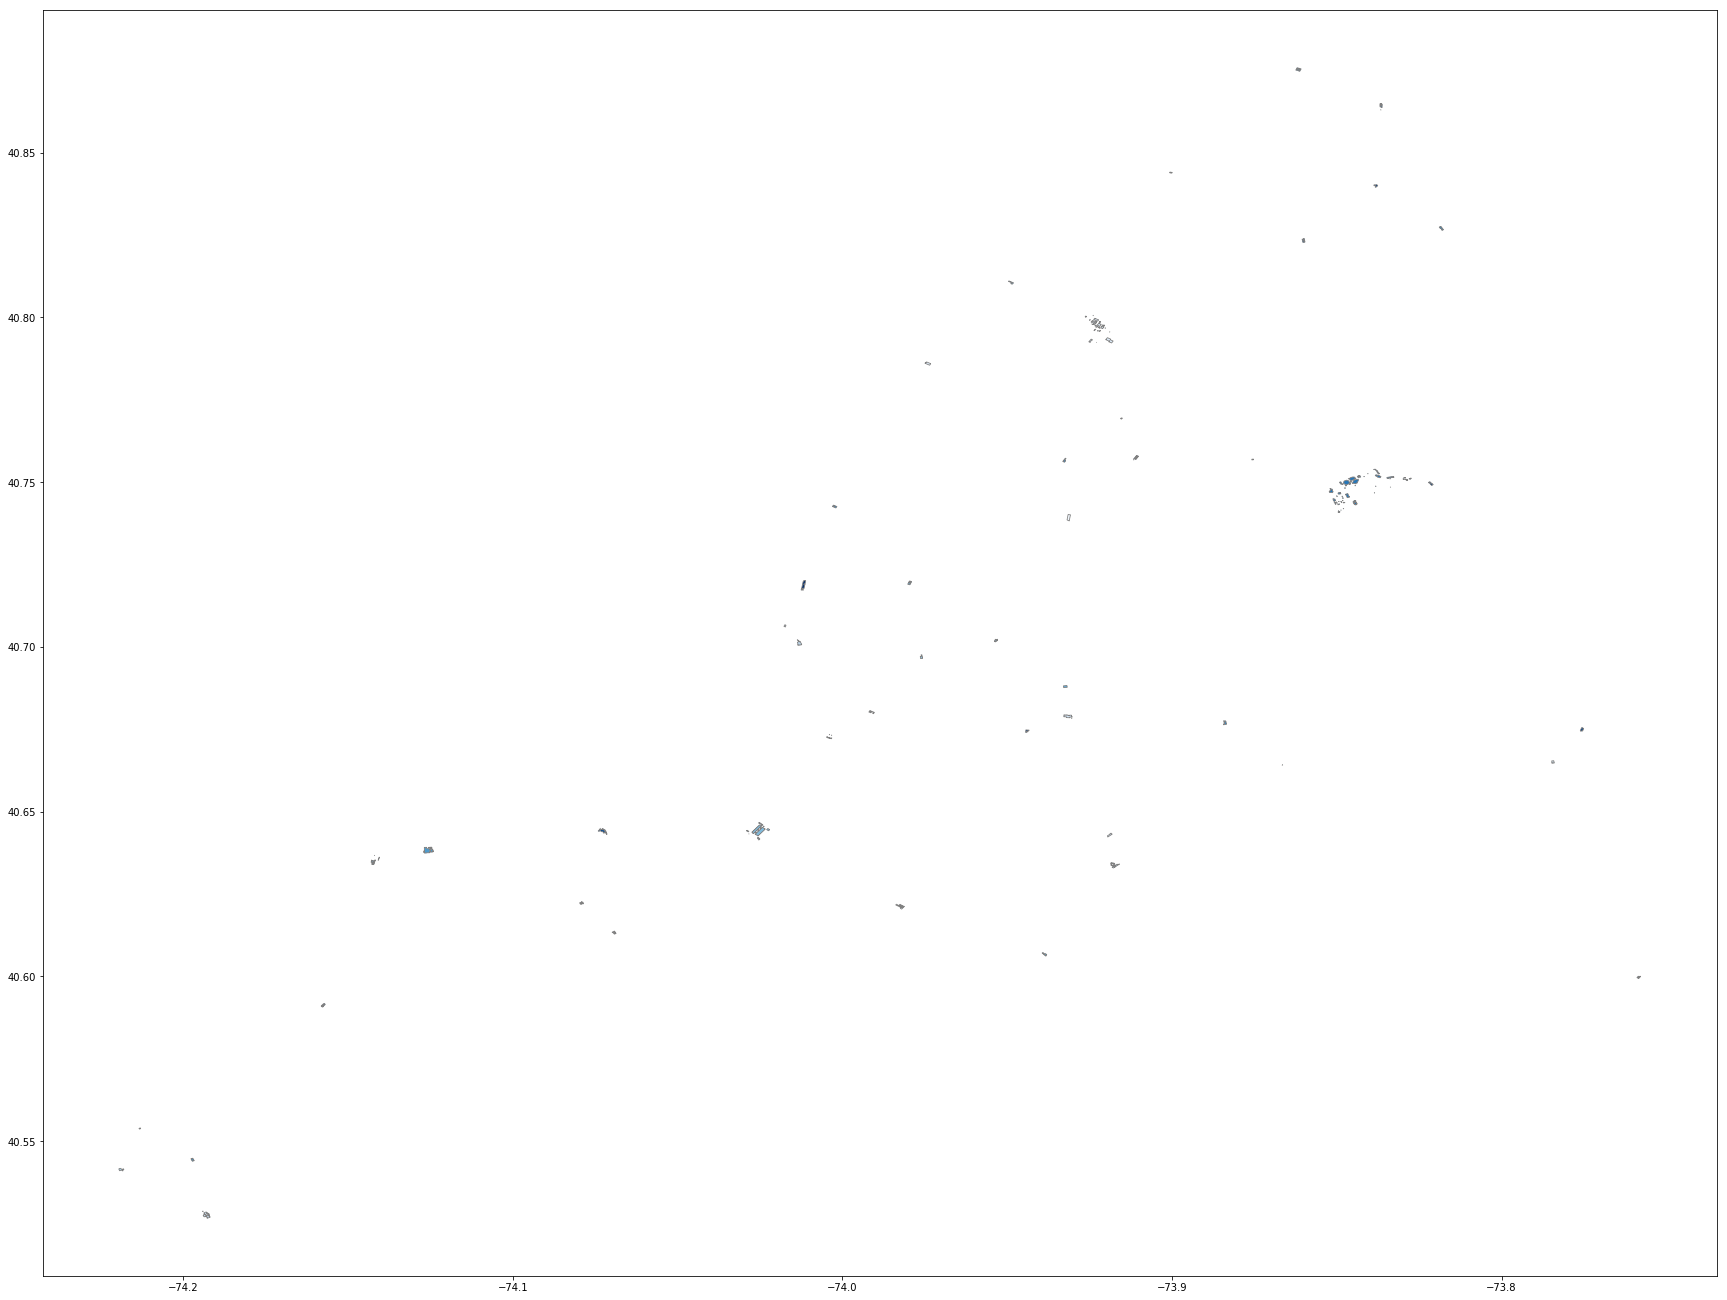

In [13]:
completed_with_bbl = gpd.GeoDataFrame(joined)

# set a variable that will call whatever column we want to visualise on the map
variable = 'Estimated Annual Emissions Reduction'
# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 30))

# create map
completed_with_bbl.plot(variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.5')

In [14]:
nta_shape = "nta_shapes/geo_export_b178036e-3432-48fd-8da3-c2f1ca72d2d1.shp"
nta_df = gpd.read_file(nta_shape)
nta_df.dtypes

boro_code      float64
boro_name       object
county_fip      object
ntacode         object
ntaname         object
shape_area     float64
shape_leng     float64
geometry      geometry
dtype: object

In [15]:
nta_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
completed_with_bbl.crs = "EPSG:4326"
completed_with_bbl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
completed_bbl_with_nta = gpd.sjoin(nta_df,completed_with_bbl, how="inner", op='intersects')
completed_bbl_with_nta.head()

c:\users\ritesh\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2048: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area_left,shape_leng,geometry,index_right,City Council District,...,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,name,num_floors,shape_area_right,shape_len,sub_code
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",174,44,...,37.0,48.218900,2009-02-14,00:00:00.000,Constructed,None,4.0,120935.206379,3307.254855,210000.0
8,2.0,Bronx,005,BX52,Schuylerville-Throgs Neck-Edgewater Park,8.843996e+07,91304.794869,"MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ...",39,13,...,19.0,49.540000,2009-02-14,00:00:00.000,Constructed,None,4.0,59838.345534,1308.620180,210000.0
8,2.0,Bronx,005,BX52,Schuylerville-Throgs Neck-Edgewater Park,8.843996e+07,91304.794869,"MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ...",43,13,...,23.0,51.371646,2009-02-14,00:00:00.000,Constructed,None,1.0,37016.455557,800.259187,210000.0
8,2.0,Bronx,005,BX52,Schuylerville-Throgs Neck-Edgewater Park,8.843996e+07,91304.794869,"MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ...",42,13,...,8.0,58.242000,2015-01-01,00:00:00.000,Constructed,None,0.0,12430.438080,452.861917,211000.0
25,3.0,Brooklyn,047,BK75,Bedford,3.262979e+07,29992.923800,"POLYGON ((-73.94193 40.70073, -73.94439 40.700...",139,33,...,14.0,53.860000,2009-02-14,00:00:00.000,Constructed,None,4.0,40477.539667,1210.644699,210000.0


In [20]:
completed_bbl_with_nta.to_file("completed_bbl_with_nta.shp")

In [14]:
x = bbl_with_nta['Percentage of Annual Electricity Consumption'].astype(str).str.replace('%', '')

In [15]:
bbl_with_nta['Percentage of Annual Electricity Consumption'] = pd.to_numeric(x, errors='coerce')

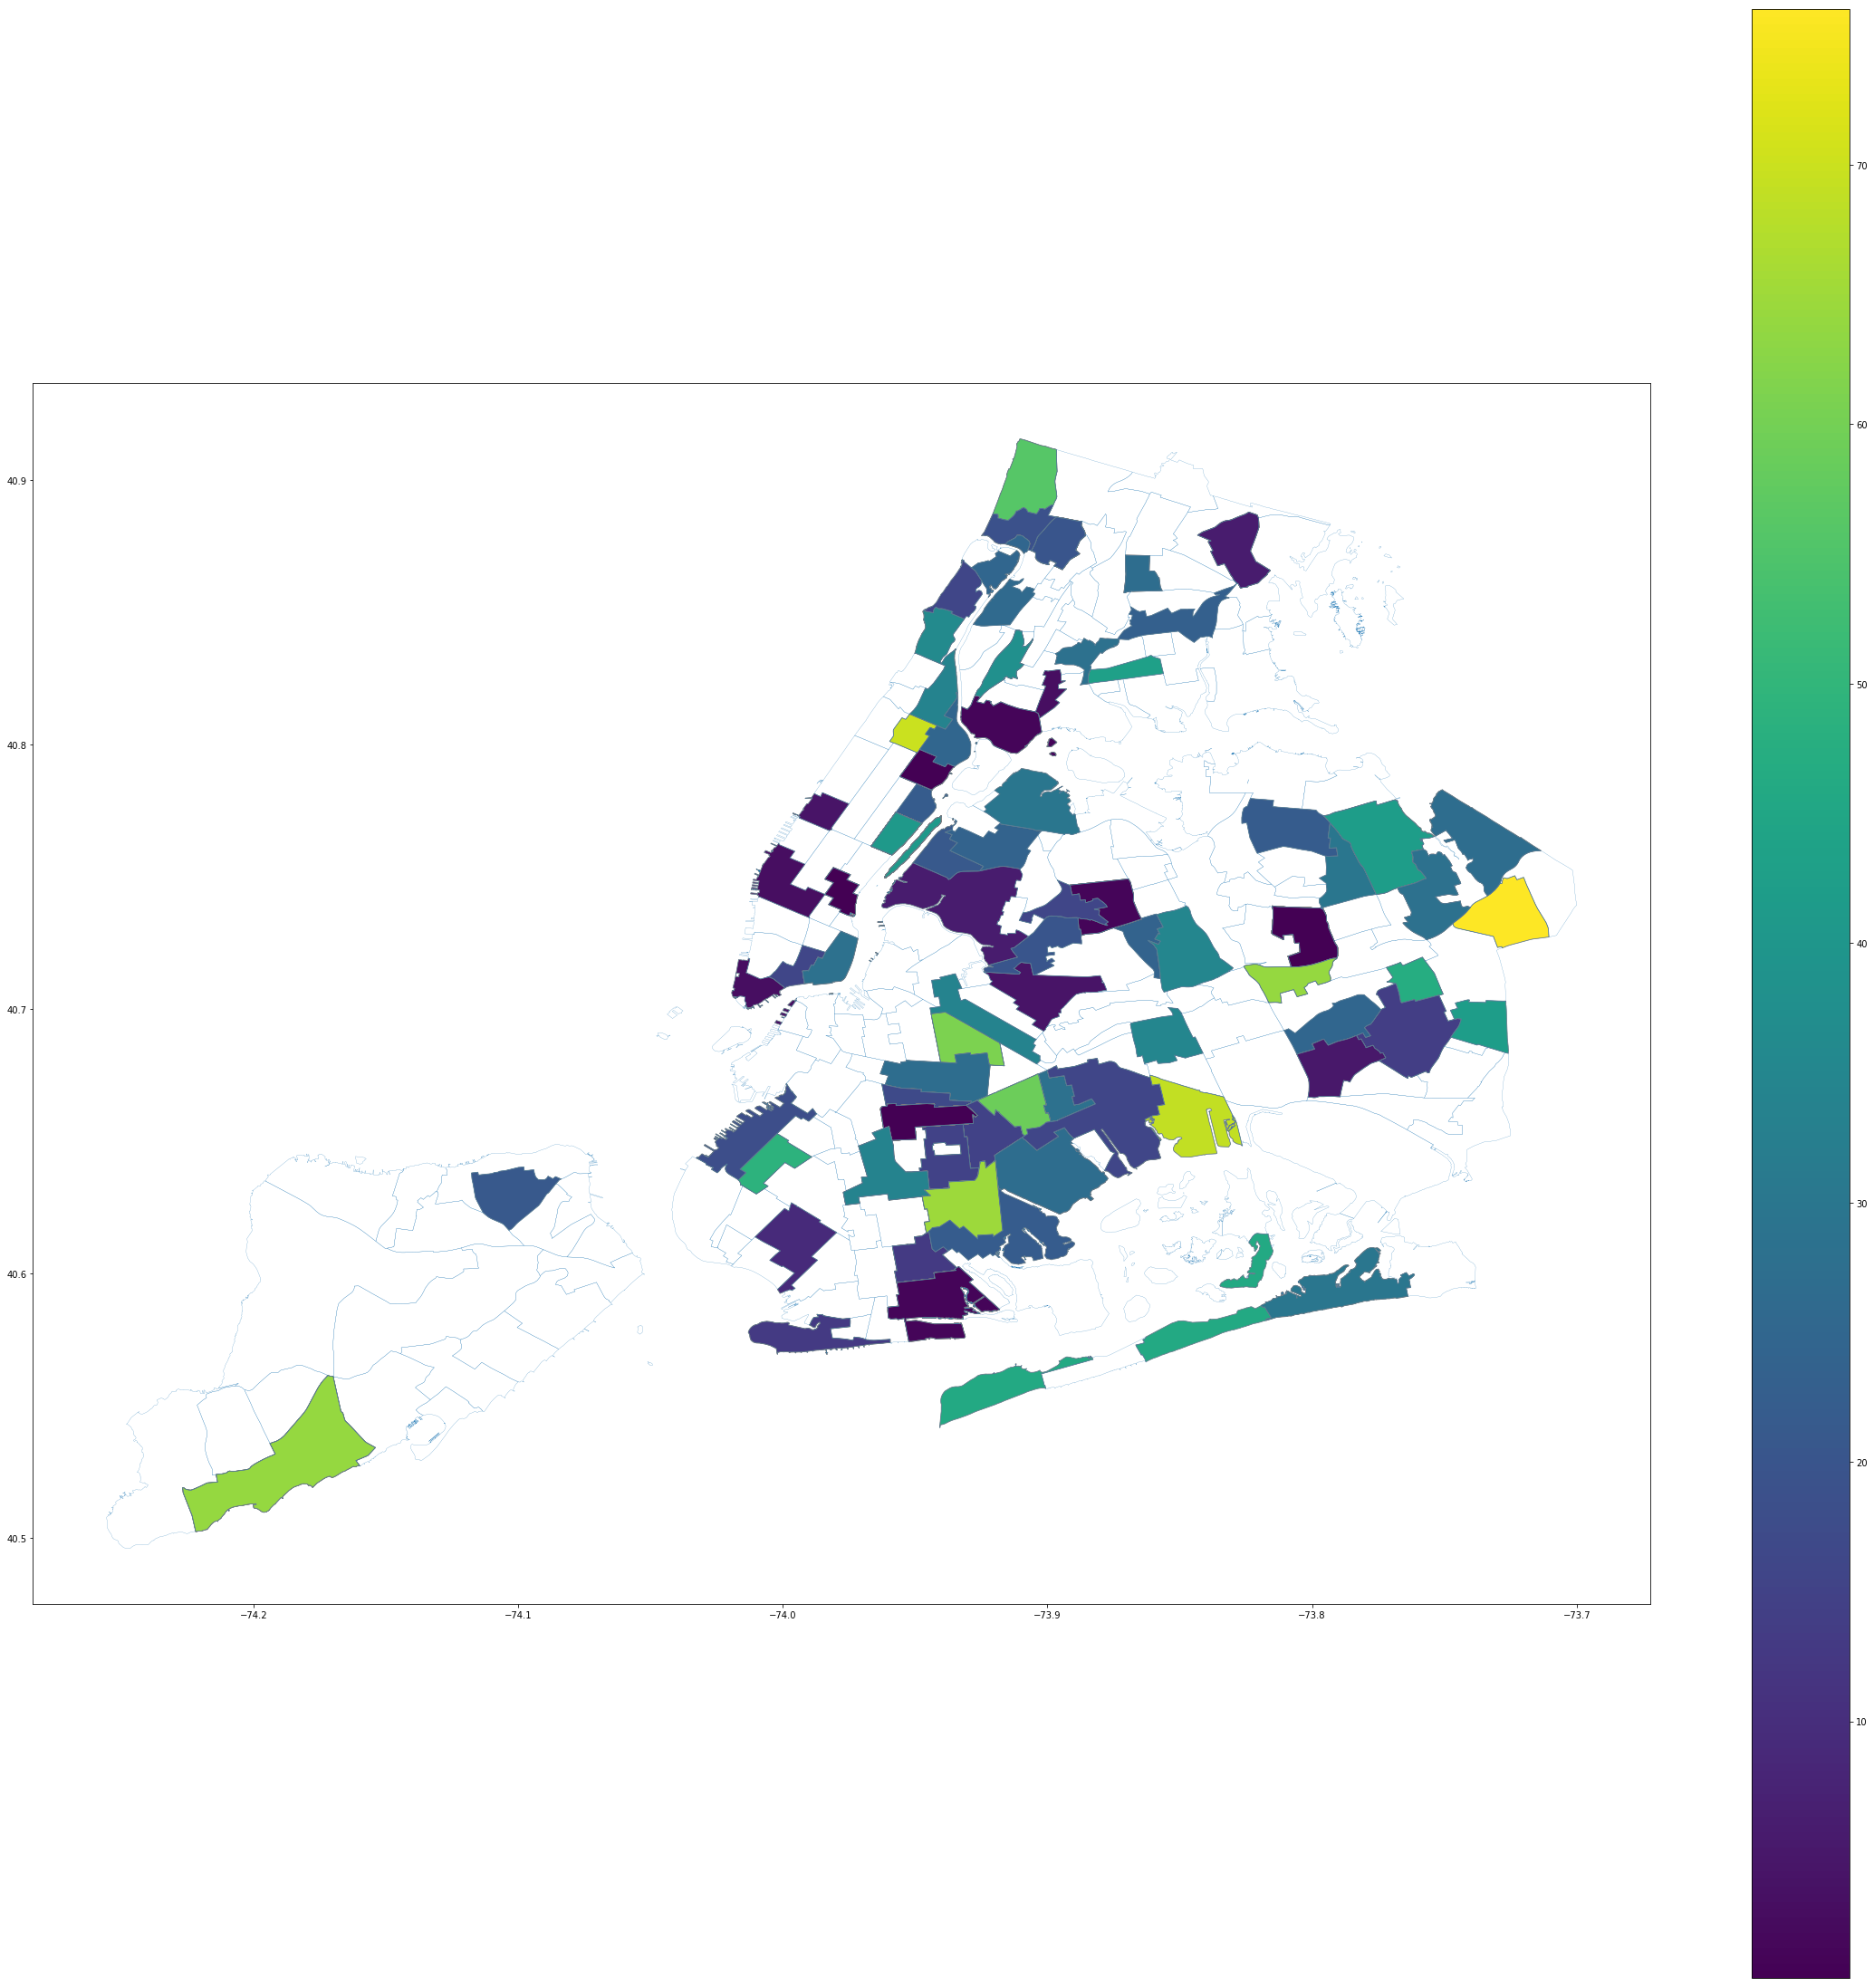

In [37]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Percentage of Annual Electricity Consumption'

# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig2, ax = plt.subplots(1, figsize=(40, 40))

# create map
nta_df.boundary.plot( ax = ax, linewidth=0.2 )
bbl_with_nta.plot(variable, linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)